# regression 문제 (US Health Insurance)

## Linear Regression

### 전처리

In [1]:
import pandas as pd
import numpy as np 

In [2]:
Insurance = pd.read_csv(r'C:\Users\goldlab\OneDrive - seoultech.ac.kr\대학\2020-1\3. 데이터마이닝\프로젝트\DM_dataset\regression_data\US Health Insurance\insurance.csv',
                           encoding='utf-8', sep=',')

# Insurance = pd.read_csv(r'C:\Users\User\OneDrive - seoultech.ac.kr\대학\2020-1\3. 데이터마이닝\프로젝트\DM_dataset\regression_data\US Health Insurance\insurance.csv',
#                            encoding='utf-8', sep=',')

In [3]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   charges   1338 non-null   float64
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
Insurance.shape

(1338, 7)

In [5]:
# 결측치 확인
Insurance.isnull().sum()

charges     0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [6]:
Insurance['sex'].unique()

array(['female', 'male'], dtype=object)

In [7]:
Insurance['sex']=Insurance['sex'].replace('female',0)
Insurance['sex']=Insurance['sex'].replace('male',1)

In [8]:
Insurance['sex'].unique()

array([0, 1], dtype=int64)

In [9]:
Insurance['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [10]:
Insurance['smoker']=Insurance['smoker'].replace('yes',0)
Insurance['smoker']=Insurance['smoker'].replace('no',1)

In [11]:
Insurance['smoker'].unique()

array([0, 1], dtype=int64)

In [12]:
Insurance.head(2)

charges  age  sex    bmi  children  smoker     region
0  16884.9240   19    0  27.90         0       0  southwest
1   1725.5523   18    1  33.77         1       1  southeast

In [13]:
Insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
def dummy_data(data, columns) :
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data

dummy_columns = ["region"]
Insurance = dummy_data(Insurance, dummy_columns)

In [15]:
# Insurance['region'] =Insurance['region'].replace('southwest',1).replace('southeast',2).replace('northwest',3).replace('northeast',4)

In [16]:
del Insurance['sex']

In [17]:
Insurance

charges  age     bmi  children  smoker  region_northeast  \
0     16884.92400   19  27.900         0       0                 0   
1      1725.55230   18  33.770         1       1                 0   
2      4449.46200   28  33.000         3       1                 0   
3     21984.47061   33  22.705         0       1                 0   
4      3866.85520   32  28.880         0       1                 0   
...           ...  ...     ...       ...     ...               ...   
1333  10600.54830   50  30.970         3       1                 0   
1334   2205.98080   18  31.920         0       1                 1   
1335   1629.83350   18  36.850         0       1                 0   
1336   2007.94500   21  25.800         0       1                 0   
1337  29141.36030   61  29.070         0       0                 0   

      region_northwest  region_southeast  region_southwest  
0                    0                 0                 1  
1                    0                 1                 0  
2                    0                 1                 0  
3                    1                 0                 0  
4                    1                 0                 0  
...                ...               ...               ...  
1333                 1                 0                 0  
1334                 0                 0                 0  
1335                 0                 1                 0  
1336                 0                 0                 1  
1337                 1                 0                 0  

[1338 rows x 9 columns]

In [18]:
aaa = Insurance

### 상관계수

In [19]:
# Insurance[['charges','age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast','region_northwest','region_southeast','region_southwest']].corr()
# Insurance[['charges','age', 'sex', 'bmi', 'children', 'smoker', 'region']].corr()
Insurance[['charges','age', 'bmi', 'children', 'smoker', 'region_northeast','region_northwest','region_southeast','region_southwest']].corr()

charges       age       bmi  children    smoker  \
charges           1.000000  0.299008  0.198341  0.067998 -0.787251   
age               0.299008  1.000000  0.109272  0.042469  0.025019   
bmi               0.198341  0.109272  1.000000  0.012759 -0.003750   
children          0.067998  0.042469  0.012759  1.000000 -0.007673   
smoker           -0.787251  0.025019 -0.003750 -0.007673  1.000000   
region_northeast  0.006349  0.002475 -0.138156 -0.022808 -0.002811   
region_northwest -0.039905 -0.000407 -0.135996  0.024806  0.036945   
region_southeast  0.073982 -0.011642  0.270025 -0.023066 -0.068498   
region_southwest -0.043210  0.010016 -0.006205  0.021914  0.036945   

                  region_northeast  region_northwest  region_southeast  \
charges                   0.006349         -0.039905          0.073982   
age                       0.002475         -0.000407         -0.011642   
bmi                      -0.138156         -0.135996          0.270025   
children                 -0.022808          0.024806         -0.023066   
smoker                   -0.002811          0.036945         -0.068498   
region_northeast          1.000000         -0.320177         -0.345561   
region_northwest         -0.320177          1.000000         -0.346265   
region_southeast         -0.345561         -0.346265          1.000000   
region_southwest         -0.320177         -0.320829         -0.346265   

                  region_southwest  
charges                  -0.043210  
age                       0.010016  
bmi                      -0.006205  
children                  0.021914  
smoker                    0.036945  
region_northeast         -0.320177  
region_northwest         -0.320829  
region_southeast         -0.346265  
region_southwest          1.000000

In [20]:
X, y = Insurance.iloc[:,1:], Insurance.iloc[:,0] 
print(X.shape, y.shape)

(1338, 8) (1338,)


### 모델 생성

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
#모델 객체 생성
m_reg = LinearRegression(fit_intercept = True) #fit_intercept -> beta0 생성 여부

#모델 학습
m_reg.fit(X, y) # 선형회귀 분석 툴 생성

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# b0값
m_reg.intercept_

11259.55139433001

In [24]:
# x들의 계수
m_reg.coef_

array([   256.97358248,    338.66463761,    474.56646951, -23836.30050226,
          586.47922829,    234.2971161 ,   -447.88089913,   -372.89544526])

In [25]:
# 선형 모델의 절편값 β0 # 추정된 상수항
beta0 = m_reg.intercept_

# 선형 모델의 기울기값 β1 # 추정된 가중치 벡터
beta1 = m_reg.coef_
print('y = {} + {} x1 + {} x2 + {} x3 + {} x4 + {} x5 + {} x6 + {} x7 + {} x8 '.format(round(beta0,3), \
        round(beta1[0],3), round(beta1[1],3), round(beta1[2],3), round(beta1[3],3), round(beta1[4],3) ,round(beta1[5],3), \
                                round(beta1[6],3),round(beta1[7],3)))

y = 11259.551 + 256.974 x1 + 338.665 x2 + 474.566 x3 + -23836.301 x4 + 586.479 x5 + 234.297 x6 + -447.881 x7 + -372.895 x8 


In [26]:
n = len(X)

# np.c_: c_을 사용하여 1차원 배열을 2차원 배열에 열로 쌓음
x = np.c_[np.ones(n), X]
print('x 배열의 차원: {} '.format(x.shape))

# matmul: matrix끼리 multiplication(곱) 연산을 할 때 사용
xtx = np.matmul(x.T,x)
print('xtx 배열의 차원: {} '.format(xtx.shape))

xtx_inv=np.linalg.inv(xtx)
print('xtx_inv 배열의 차원: {} '.format(xtx.shape))

beta=np.matmul(np.matmul(xtx_inv, x.T), list(y))

print('y = {} + {} x1 + {} x2 + {} x3 + {} x4 + {} x5 + {} x6 + {} x7 + {} x8 '.format(round(beta0,3), \
        round(beta1[0],3), round(beta1[1],3), round(beta1[2],3), round(beta1[3],3), round(beta1[4],3) ,round(beta1[5],3), \
                                round(beta1[6],3),round(beta1[7],3)))

x 배열의 차원: (1338, 9) 
xtx 배열의 차원: (9, 9) 
xtx_inv 배열의 차원: (9, 9) 
y = 11259.551 + 256.974 x1 + 338.665 x2 + 474.566 x3 + -23836.301 x4 + 586.479 x5 + 234.297 x6 + -447.881 x7 + -372.895 x8 


In [27]:
y_pred = m_reg.predict(X)
print(np.round(list(y_pred),3)) # 27개
print(np.round(m_reg.score(X, y),3))

[25217.897  3512.166  6770.263 ...  4080.686  1184.348 37014.218]
0.751


In [28]:
import matplotlib.pyplot as plt

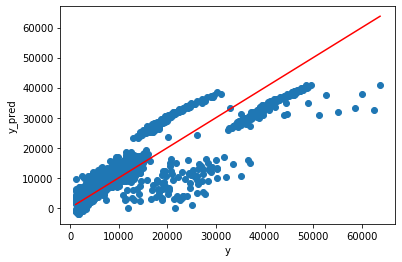

In [29]:
# 실측치y와 예측치y의 관계성 #
plt.scatter(y, y_pred)
line = np.linspace(min(y.values), max(y.values), 1000)
plt.plot(line, line, color = 'r')
plt.xlabel('y')
plt.ylabel('y_pred')
plt.show()

In [30]:
# 다른 툴 사용 예시 #
from sklearn.metrics import r2_score as r2
r2 = np.round(r2(y, y_pred),3)
r2

0.751

In [31]:
# 조정된 결정계수 #
n, p = Insurance.iloc[:,1:].shape

adj_r2 = 1 - ((1-r2) * (n-1)) / (n-p-1) # n= 27 p=5
adj_r2

0.7495011286681715

In [32]:
# Sum of Square Error
SSE = sum((y-y_pred)**2)

In [33]:
# Sum of Square Regression
SSR = sum((y_pred-np.mean(y))**2)

In [34]:
SST = SSE + SSR

In [35]:
SSE,SSR,SST

(48845249272.98852, 147228972295.379, 196074221568.36752)

In [36]:
n,p = Insurance.iloc[:,1:].shape
n,p

(1338, 8)

In [37]:
# mean square error / 회귀로 예측해도 좁힐 수 없는 관측값과의 차이가 얼마나 있는지 말해주는 수치
MSE=SSE/(n-p-1)

In [38]:
# regression mean square:평균으로 말하는 것과 회귀로 예측해서 말하는 것의 차이가 얼마나 있는지를 말해주는 수치
MSR=SSR/p

In [39]:
MSE,MSR

(36753385.457478195, 18403621536.922375)

In [40]:
# f분포 하에서 관찰한 값이 얼마나 이상한지 아닌지, 보기힘든건지 아닌지 판단
# 즉 모형의 적합성을 판단하기 위해 f의 수치를 확인
# 공식: 독립변수(X)로 의해 설명된 variation(MSR) / 독립변수(X)로 의해 설명되지 못한 variation(MSE) 
f=MSR/MSE
f

500.7326891889846

In [41]:
# 수치해석기능을 제공하는 파이썬 패키지
# stats 서브패키지는 확률분포 분석을 위한 다양한 기능을 제공
from scipy import stats

In [42]:
# pvalue로 기각할지 선정 
# cdf(cumulative distribution function: 누적분포함수)
# 회귀분석은 F-통계량에 대한 우측검정으로 가설을 검정
pvalue = 1-stats.f.cdf(f,p,n-p-1) # f값이 x임 # df은 분자, 분모 순서대로 넣기 -> "pvalue"
pvalue

1.1102230246251565e-16

In [43]:
import statsmodels.api as sm 

In [44]:
X1 = sm.add_constant(X)

In [45]:
# 예시1
reg = sm.OLS(y, X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:19:42   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9007.6411    808.783     11.137      0.000    7421.012    1.06e+04
age                256.9736     11.891     21.610      0.000     233.646     280.301
bmi                338.6646     28.559     11.858      0.000     282.639     394.690
children           474.5665    137.740      3.445      0.001     204.355     744.778
smoker           -2.384e+04    411.856    -57.875      0.000   -2.46e+04    -2.3e+04
region_northeast  2838.3895    336.985      8.423      0.000    2177.310    3499.469
region_northwest  2486.2074    340.109      7.310      0.000    1819.000    3153.415
region_southeast  1804.0294    383.889      4.699      0.000    1050.935    2557.124
region_southwest  1879.0148    357.026      5.263      0.000    1178.619    2579.411
==============================================================================
Omnibus:                      300.735   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.516
Skew:                           1.212   Prob(JB):                    3.48e-157
Kurtosis:                       5.654   Cond. No.                     2.40e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.1e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
# 위 값 비교 #
beta=[m_reg.intercept_]+list(m_reg.coef_) 

print(beta)
print(f)
print(pvalue)

[11259.55139433001, 256.97358248328374, 338.66463760755244, 474.5664695110127, -23836.300502263206, 586.4792282870152, 234.29711610406832, -447.8808991281551, -372.89544526292906]
500.7326891889846
1.1102230246251565e-16


In [47]:
import statsmodels.formula.api as smf

In [48]:
# 예시2
model = smf.ols(formula = 'charges ~ age + bmi + children + smoker + region_northeast + region_northwest + region_southeast + region_southwest', data = Insurance)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:19:42   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         9007.6411    808.783     11.137      0.000    7421.012    1.06e+04
age                256.9736     11.891     21.610      0.000     233.646     280.301
bmi                338.6646     28.559     11.858      0.000     282.639     394.690
children           474.5665    137.740      3.445      0.001     204.355     744.778
smoker           -2.384e+04    411.856    -57.875      0.000   -2.46e+04    -2.3e+04
region_northeast  2838.3895    336.985      8.423      0.000    2177.310    3499.469
region_northwest  2486.2074    340.109      7.310      0.000    1819.000    3153.415
region_southeast  1804.0294    383.889      4.699      0.000    1050.935    2557.124
region_southwest  1879.0148    357.026      5.263      0.000    1178.619    2579.411
==============================================================================
Omnibus:                      300.735   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.516
Skew:                           1.212   Prob(JB):                    3.48e-157
Kurtosis:                       5.654   Cond. No.                     2.40e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.1e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
from patsy import *

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
y, X = dmatrices('charges ~ age + bmi + children + smoker + region_northeast + region_northwest + region_southeast + region_southwest',data=Insurance, return_type = "dataframe")
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# intercept를 제외한 나머지 변수들이 다중공선성을 띄지 않음을 볼 수 있음
vif

C:\Users\goldlab\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\goldlab\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF Factor          features
0    0.000000         Intercept
1    1.016188               age
2    1.104197               bmi
3    1.003714          children
4    1.006369            smoker
5         inf  region_northeast
6         inf  region_northwest
7         inf  region_southeast
8         inf  region_southwest

## regression tree

In [52]:
y = Insurance.charges.copy()
del Insurance['charges']
x = Insurance

In [53]:
x.head(2)

age    bmi  children  smoker  region_northeast  region_northwest  \
0   19  27.90         0       0                 0                 0   
1   18  33.77         1       1                 0                 0   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0

In [54]:
col_names = ['charges','age','bmi','children','smoker','region_northeast','region_northwest','region_southeast','region_southwest']

In [55]:
y.head(2)

0    16884.9240
1     1725.5523
Name: charges, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.tree import DecisionTreeRegressor as dtr

In [59]:
test_reg = dtr(max_depth=4)
test_reg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [60]:
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree
from IPython.display import Image

C:\Users\goldlab\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [61]:
# 문자열 데이터를저장하는 역할
dot_file =StringIO()

# export_graphviz: tree 시각화용
# tree.export_graphviz: reg_tree - 해당 model, feature_names - feature 이름, out_file - 어떤 데이터를 보일지
tree.export_graphviz(test_reg,  feature_names=col_names, out_file = dot_file, filled =True)

# Data를 graph로 표시하기 위해 Dot class로 변환
graph=pydotplus.graph_from_dot_data(dot_file.getvalue())

#dot_file.getvalue(): 데이터가 어떻게 들어가는지 볼 수 있음.
dot_file.getvalue() 

'digraph Tree {\nnode [shape=box, style="filled", color="black"] ;\n0 [label="smoker <= 0.5\\nmse = 144333621.933\\nsamples = 1070\\nvalue = 13346.09", fillcolor="#f9e1d0"] ;\n1 [label="bmi <= 29.972\\nmse = 134785661.424\\nsamples = 220\\nvalue = 31767.008", fillcolor="#eeac7d"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="age <= 41.0\\nmse = 23902036.634\\nsamples = 105\\nvalue = 21006.654", fillcolor="#f4cbad"] ;\n1 -> 2 ;\n3 [label="bmi <= 24.275\\nmse = 10491005.759\\nsamples = 63\\nvalue = 18348.124", fillcolor="#f6d3b9"] ;\n2 -> 3 ;\n4 [label="mse = 3565036.807\\nsamples = 23\\nvalue = 16174.134", fillcolor="#f7d9c3"] ;\n3 -> 4 ;\n5 [label="mse = 10193244.376\\nsamples = 40\\nvalue = 19598.168", fillcolor="#f5cfb3"] ;\n3 -> 5 ;\n6 [label="bmi <= 25.96\\nmse = 17514384.848\\nsamples = 42\\nvalue = 24994.451", fillcolor="#f2c09b"] ;\n2 -> 6 ;\n7 [label="mse = 11000335.175\\nsamples = 24\\nvalue = 23113.033", fillcolor="#f3c5a4"] ;\n6 -> 7 ;\n8 [label

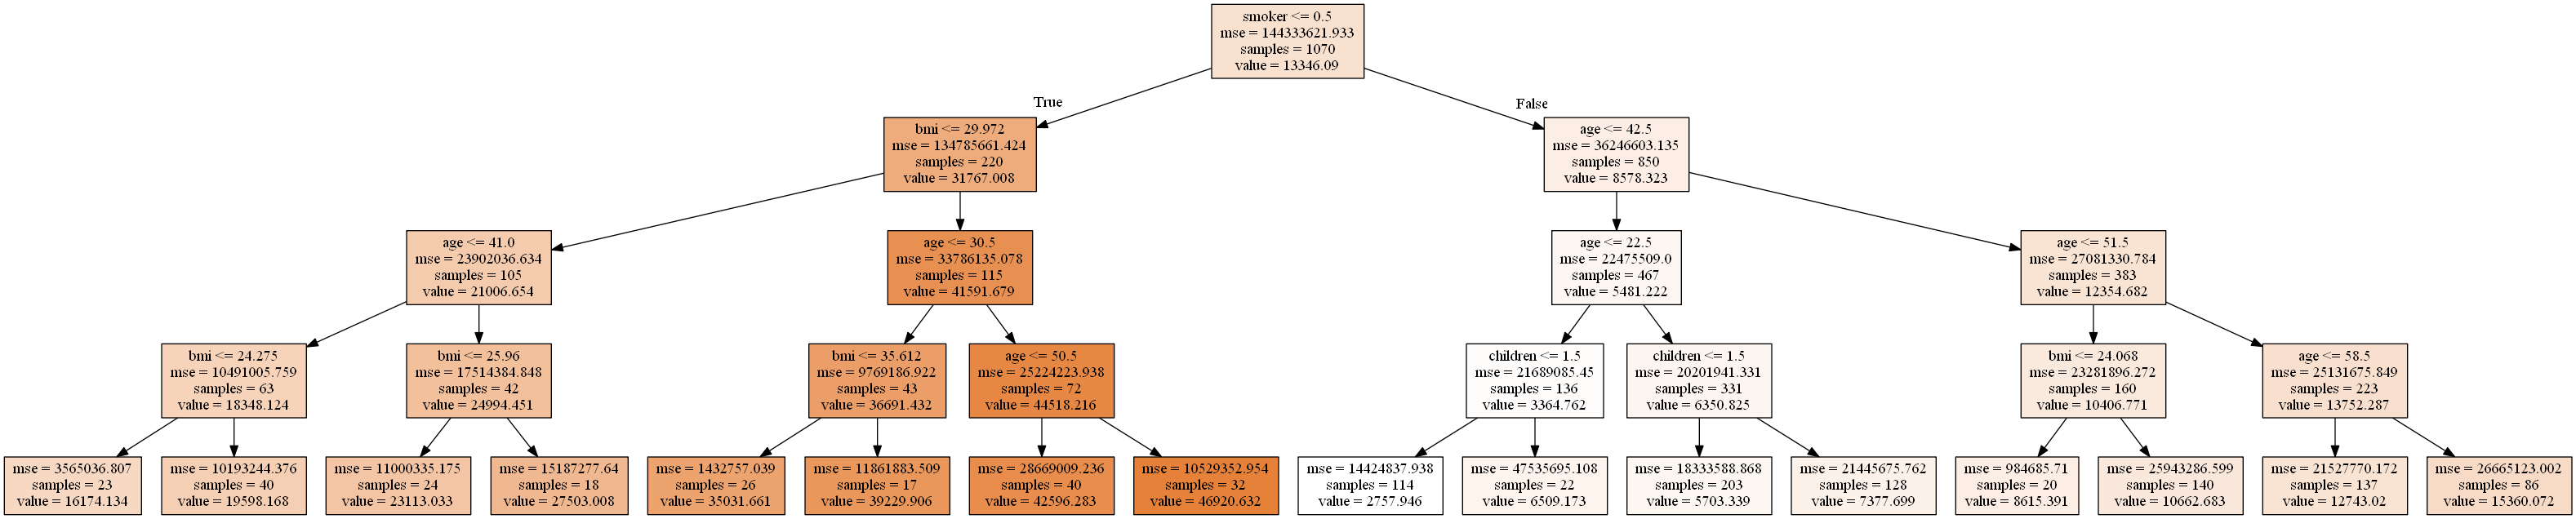

In [62]:
Image(graph.create_png())

In [63]:
# Node별 MSE 값 구해보기 #
col_names = ['age','bmi','children','smoker','region_northeast','region_northwest','region_southeast','region_southwest','charges']

boston_xx = pd.DataFrame(data=X_train, columns= col_names, index=y_train.index)
boston_xx['MEDV'] = y_train
yy = boston_xx.MEDV.copy()
del boston_xx['MEDV']
boston_ = pd.concat((boston_xx,yy), axis=1)
boston_ # train_data 404.8개 = 405개

age     bmi  children  smoker  region_northeast  region_northwest  \
560   46.0  19.950       2.0     1.0               0.0               1.0   
1285  47.0  24.320       0.0     1.0               1.0               0.0   
1142  52.0  24.860       0.0     1.0               0.0               0.0   
969   39.0  34.320       5.0     1.0               0.0               0.0   
486   54.0  21.470       3.0     1.0               0.0               1.0   
...    ...     ...       ...     ...               ...               ...   
1095  18.0  31.350       4.0     1.0               1.0               0.0   
1130  39.0  23.870       5.0     1.0               0.0               0.0   
1294  58.0  25.175       0.0     1.0               1.0               0.0   
860   37.0  47.600       2.0     0.0               0.0               0.0   
1126  55.0  29.900       0.0     1.0               0.0               0.0   

      region_southeast  region_southwest  charges         MEDV  
560                0.0               0.0      NaN   9193.83850  
1285               0.0               0.0      NaN   8534.67180  
1142               1.0               0.0      NaN  27117.99378  
969                1.0               0.0      NaN   8596.82780  
486                0.0               0.0      NaN  12475.35130  
...                ...               ...      ...          ...  
1095               0.0               0.0      NaN   4561.18850  
1130               1.0               0.0      NaN   8582.30230  
1294               0.0               0.0      NaN  11931.12525  
860                0.0               1.0      NaN  46113.51100  
1126               0.0               1.0      NaN  10214.63600  

[1070 rows x 10 columns]

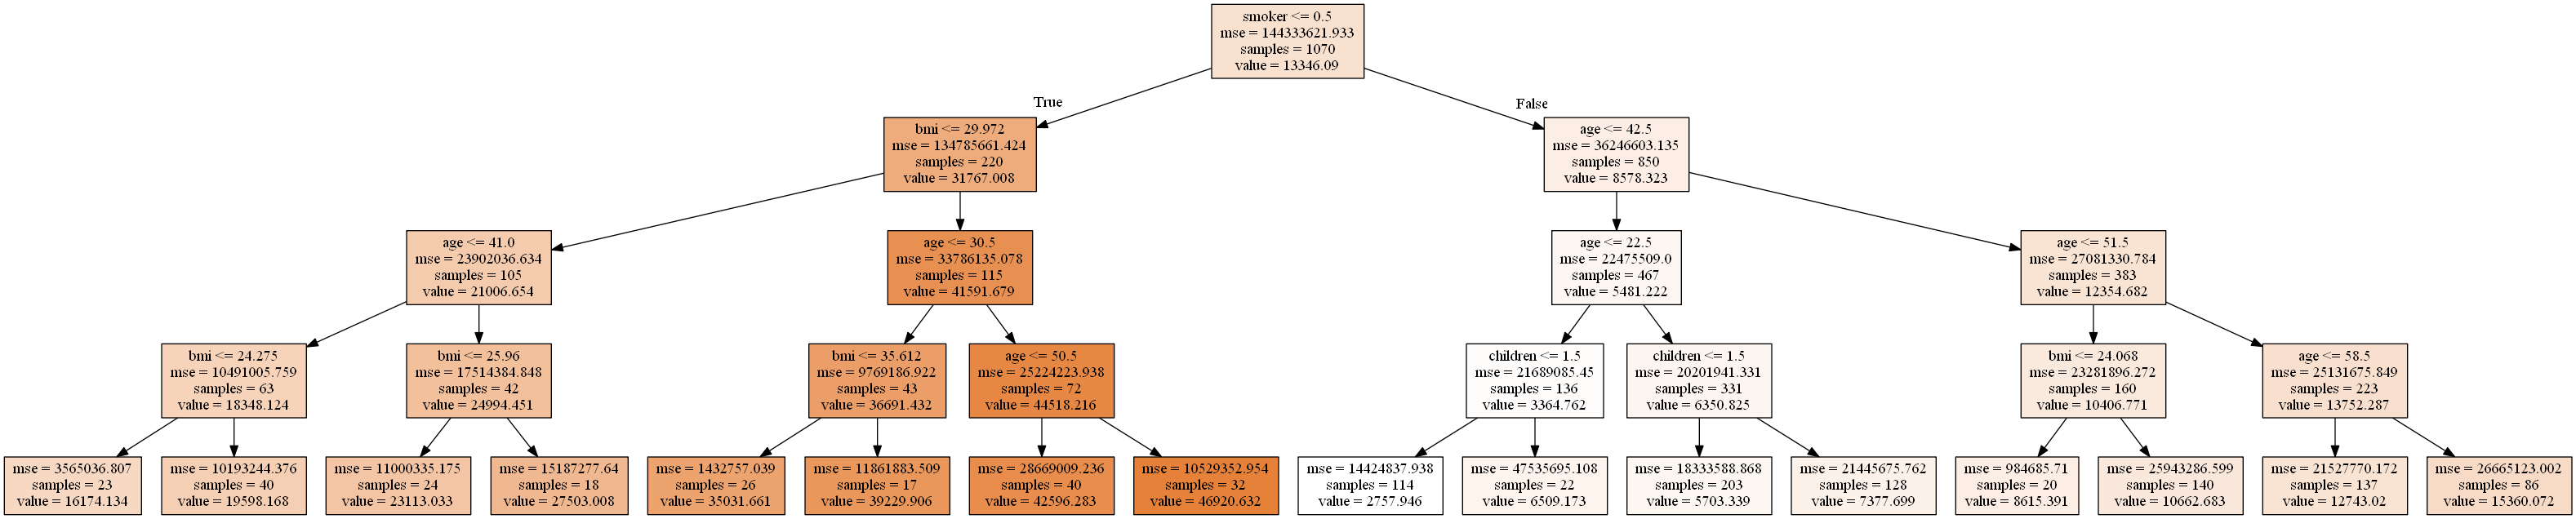

In [64]:
Image(graph.create_png())

In [65]:
# Root node의 MSE
Root_MSE = sum((boston_['MEDV'] - boston_['MEDV'].mean())**2) / len(boston_['MEDV'])
print(Root_MSE)

# y값의 mean
Root_mean = boston_['MEDV'].mean()
print(Root_mean)

144333621.93314755
13346.089736364489


In [66]:
# max_depth 100일때 overfitting 현상 #
reg_tree_h = dtr(max_depth=100, random_state=0)
reg_tree_h.fit(X_train,y_train) #criterion='mse'

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=100,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [67]:
print("훈련 세트 정확도: {:.3f}".format(reg_tree_h.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(reg_tree_h.score(X_test, y_test)))

훈련 세트 정확도: 0.998
테스트 세트 정확도: 0.747


In [68]:
y_pred_h = reg_tree_h.predict(X_test)
print(f'{y_test}')
print(f'{y_pred_h}')

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64
[ 9225.2564   4571.41305 28950.4692   9225.2564  33732.6867  11326.71487
  1628.4709  14692.66935  2302.3     10493.9458  19361.9988   7201.70085
  4040.55825 46200.9851  48970.2476  48885.13561  9304.7019  41676.0811
  8515.7587  21348.706    4877.98105  8520.026    1744.465    1984.4533
 10493.9458  10435.06525 13228.84695  4618.0799   9447.25035 16586.49771
  8162.71625 11353.2276   1137.4697   5425.02335  3410.324   12797.20962
  2102.2647   6849.026   24667.419   37742.5757   4830.63     2639.0429
 10713.644   12323.936    5124.1887  12913.9924  26018.95052  4877.98105
 40273.6455   4949.7587  13887.9685   1720.3537   6393.60345  1708.0014
 20781.48892 10370.91255  3943.5954  58571.07448 11362.755   10435.06525
 13393.756 

In [69]:
# max_depth 6일때
reg_tree_f = dtr(max_depth=4, random_state=0)
reg_tree_f.fit(X_train,y_train) #criterion='mse'

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [70]:
print("훈련 세트 정확도: {:.3f}".format(reg_tree_f.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(reg_tree_f.score(X_test, y_test)))

훈련 세트 정확도: 0.865
테스트 세트 정확도: 0.864


In [71]:
# f print 
y_pred_f = reg_tree_f.predict(X_test)
print(f'{y_test}')
print(f'{y_pred_f}')

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64
[10662.68286257  5703.33875202 27503.00828667 10662.68286257
 35031.66093192  5703.33875202  2757.94556798 15360.07212779
  5703.33875202 10662.68286257 19598.16779625  7377.69881773
  5703.33875202 42596.28255675 46920.6323175  42596.28255675
 10662.68286257 42596.28255675 10662.68286257 27503.00828667
  7377.69881773 10662.68286257  2757.94556798  2757.94556798
 10662.68286257 12743.01992752 15360.07212779  7377.69881773
 10662.68286257  2757.94556798  7377.69881773 12743.01992752
  2757.94556798  7377.69881773  5703.33875202 10662.68286257
  2757.94556798 10662.68286257 23113.03256333 42596.28255675
  6509.17276364  2757.94556798 12743.01992752 15360.07212779
  7377.69881773 15360.07212779  6509.17276364  7377.69881773
 4259

In [72]:
import matplotlib.pyplot as plt

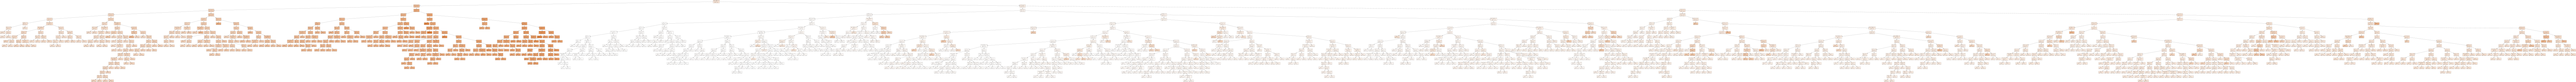

In [73]:
# max_depth 100일 때
dot_file =StringIO()

# tree.export_graphviz: reg_tree - 해당 model, feature_names - feature 이름, out_file - 어떤 
tree.export_graphviz(reg_tree_h, feature_names=col_names, out_file = dot_file, filled =True)

graph=pydotplus.graph_from_dot_data(dot_file.getvalue())
graph.set_size('"100,100!"')

#dot 형식으로 데이터가 어떻게 들어가는지 볼 수 있음.
dot_file.getvalue()

# Depth = 100일 때
Image(graph.create_png()) #png 파일 생성하지 않고, ipython consle에 찍어 주는 것

In [74]:
col_names = ['intercept','age', 'bmi','children','smoker','region_northeast','region_northwest','region_southeast','region_southwest']

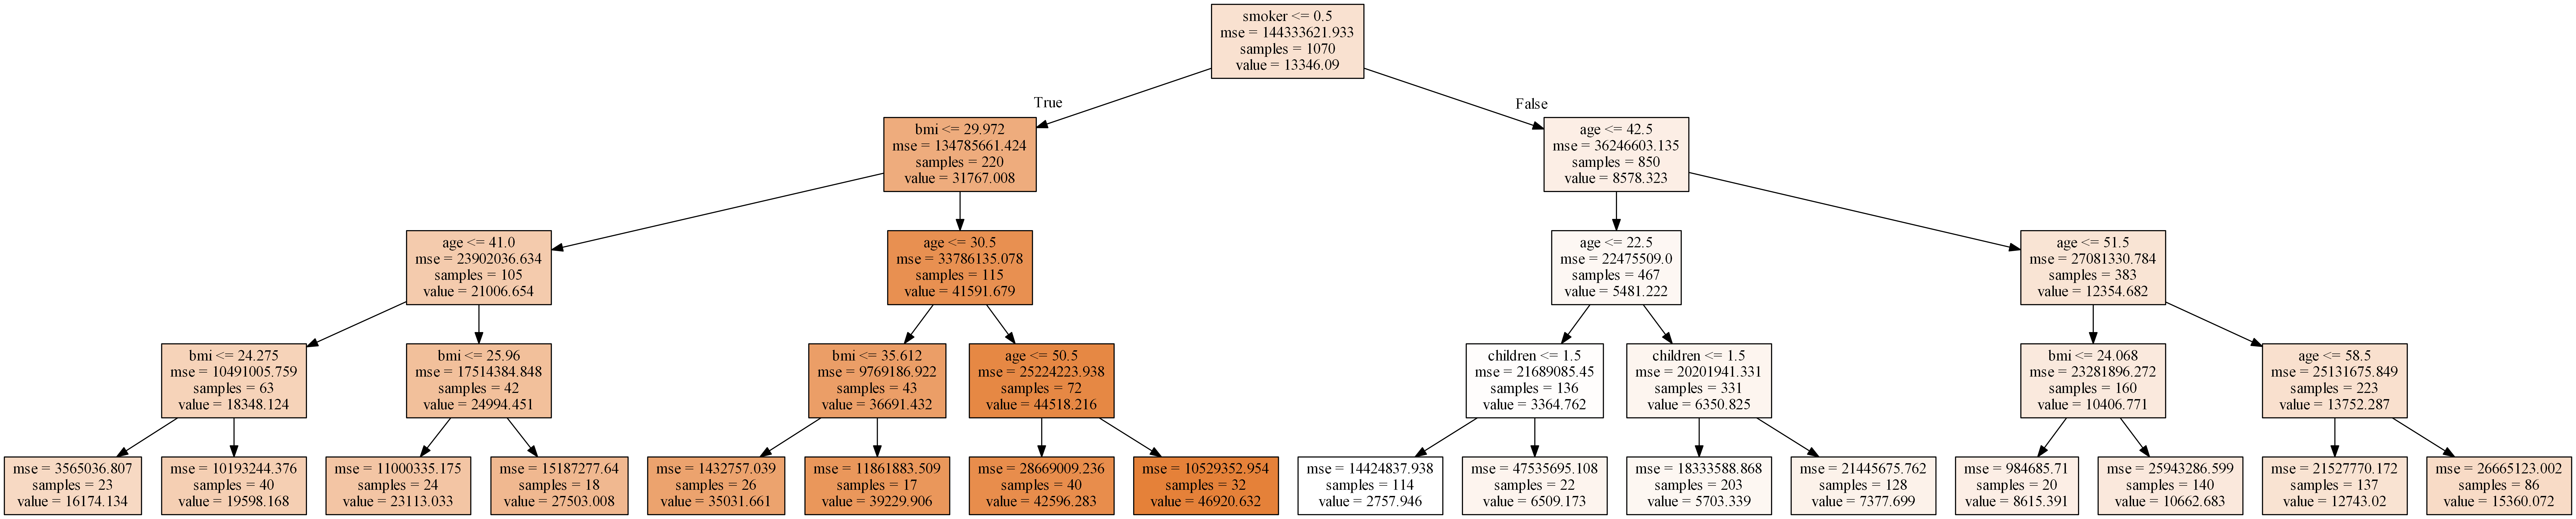

In [75]:
dot_file =StringIO()

# tree.export_graphviz: reg_tree - 해당 model, feature_names - feature 이름, out_file - 어떤 
tree.export_graphviz(reg_tree_f, feature_names=col_names, out_file = dot_file, filled =True)

graph=pydotplus.graph_from_dot_data(dot_file.getvalue())
graph.set_size('"100,100!"')

#dot 형식으로 데이터가 어떻게 들어가는지 볼 수 있음.
dot_file.getvalue() 

# Depth = 6일 때
Image(graph.create_png()) #png 파일 생성하지 않고, ipython consle에 찍어 주는 것

In [76]:
# max_depth: 1000, min_samples_split:30, min_samples_leaf:10로 설정시
# depth를 끝까지 내려도 설정해둔 값들 때문에 overfitting되는 것을 방지할 수 있음 
from sklearn.tree import DecisionTreeRegressor as dtr

# min_samples_split: 분기 시 최소한의 sample수를 충족해야 할 때 쓰임
# min_samples_leaf: 분기 후 node가 최소한의 sample수를 충족해야 할 때 쓰임

reg_tree_ad = dtr(max_depth=1000, min_samples_split=30, min_samples_leaf=20, random_state=0)
reg_tree_ad.fit(X_train,y_train) #criterion='mse'

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1000,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=30,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

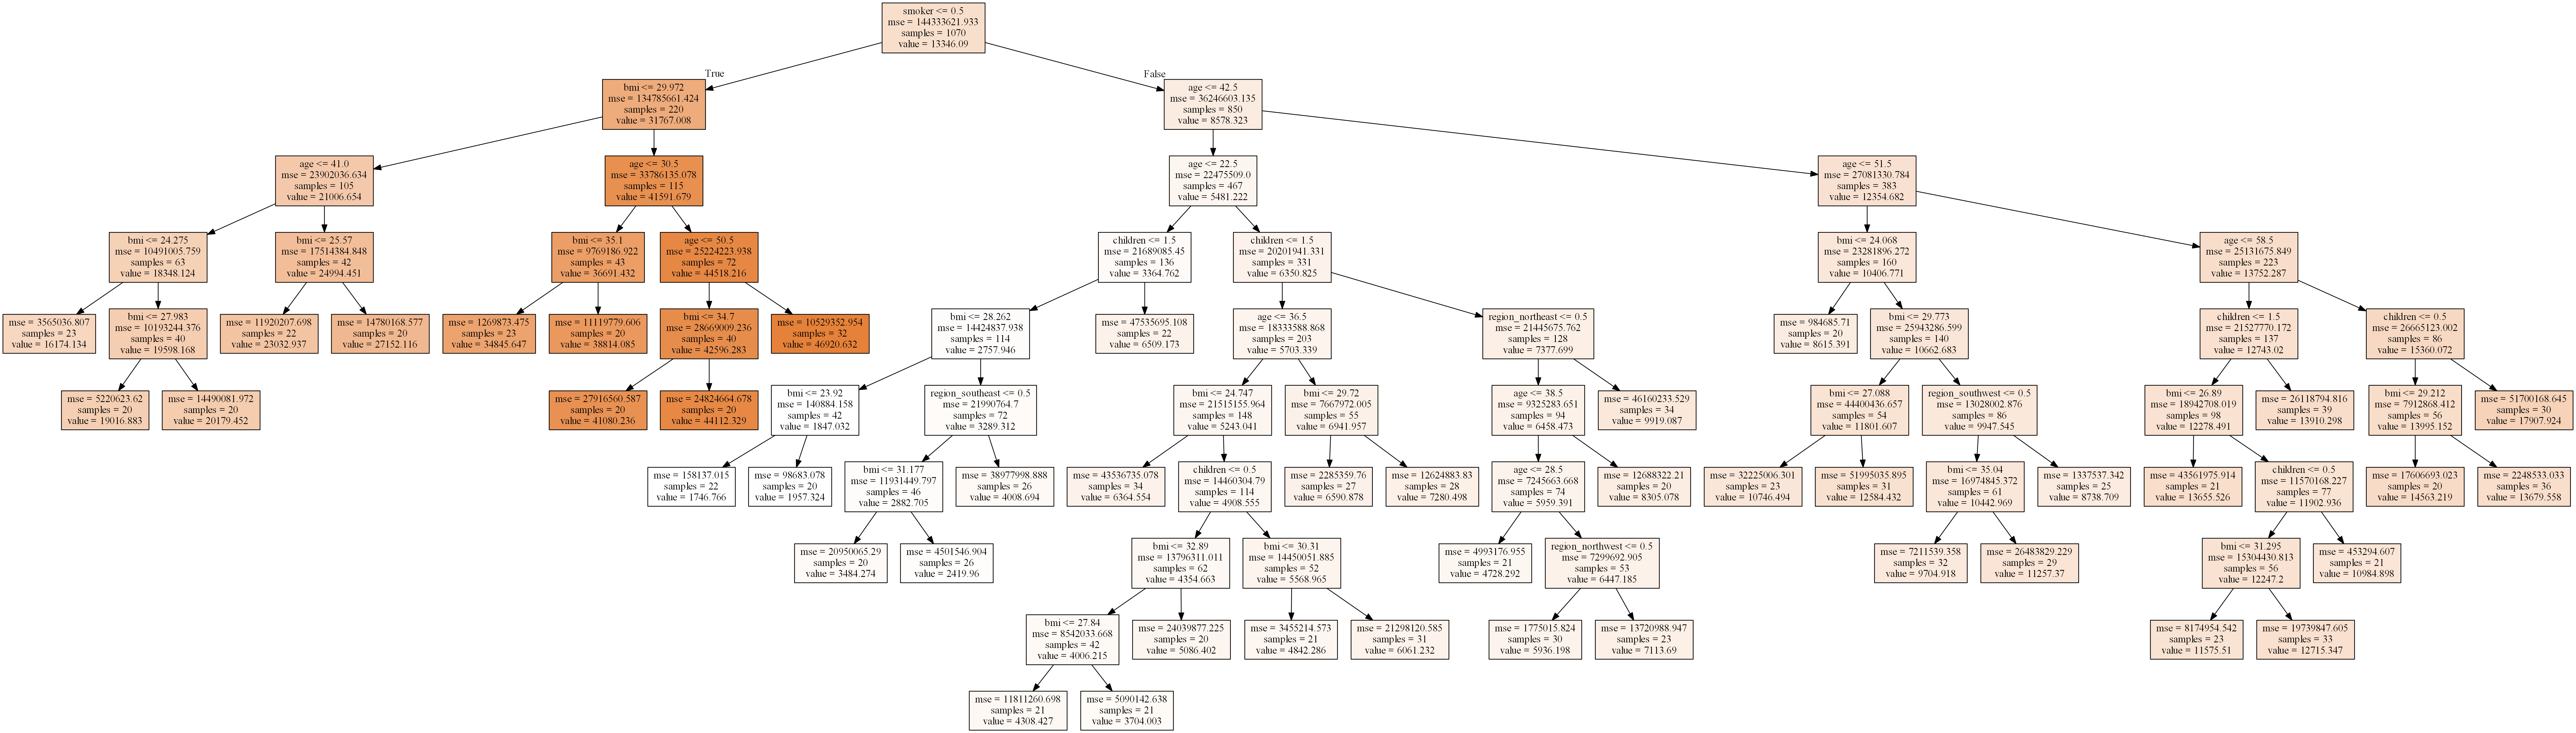

In [77]:
# max_depth와 min_samples_split, min_samples_leaf 조절했을 때 #
dot_file =StringIO()

# tree.export_graphviz: reg_tree - 해당 model, feature_names - feature 이름, out_file - 어떤 
tree.export_graphviz(reg_tree_ad, feature_names=col_names, out_file = dot_file, filled =True)

graph=pydotplus.graph_from_dot_data(dot_file.getvalue())

graph.set_size('"100,100!"')

#dot 형식으로 데이터가 어떻게 들어가는지 볼 수 있음.
dot_file.getvalue() 

Image(graph.create_png())

In [78]:
# 성능측정 -> 오히려 성능이 조정했을 때보다 떨어지게 나올 수가 있음.
print("훈련 세트 정확도: {:.3f}".format(reg_tree_ad.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(reg_tree_ad.score(X_test, y_test)))

훈련 세트 정확도: 0.876
테스트 세트 정확도: 0.866


In [79]:
# tree를 만드는 결정에 각 특성이 얼마나 중요한지는 평가
feature_imp = reg_tree_ad.feature_importances_
feature_imp

array([0.00000000e+00, 1.14970488e-01, 1.80410904e-01, 6.79580984e-03,
       6.94941433e-01, 2.21126652e-03, 1.33483450e-04, 1.55741606e-04,
       3.80873833e-04])

In [80]:
X_train

Intercept   age     bmi  children  smoker  region_northeast  \
560         1.0  46.0  19.950       2.0     1.0               0.0   
1285        1.0  47.0  24.320       0.0     1.0               1.0   
1142        1.0  52.0  24.860       0.0     1.0               0.0   
969         1.0  39.0  34.320       5.0     1.0               0.0   
486         1.0  54.0  21.470       3.0     1.0               0.0   
...         ...   ...     ...       ...     ...               ...   
1095        1.0  18.0  31.350       4.0     1.0               1.0   
1130        1.0  39.0  23.870       5.0     1.0               0.0   
1294        1.0  58.0  25.175       0.0     1.0               1.0   
860         1.0  37.0  47.600       2.0     0.0               0.0   
1126        1.0  55.0  29.900       0.0     1.0               0.0   

      region_northwest  region_southeast  region_southwest  
560                1.0               0.0               0.0  
1285               0.0               0.0               0.0  
1142               0.0               1.0               0.0  
969                0.0               1.0               0.0  
486                1.0               0.0               0.0  
...                ...               ...               ...  
1095               0.0               0.0               0.0  
1130               0.0               1.0               0.0  
1294               0.0               0.0               0.0  
860                0.0               0.0               1.0  
1126               0.0               0.0               1.0  

[1070 rows x 9 columns]

In [81]:
col_names = ['intercept','age', 'bmi','children','smoker','region_northeast','region_northwest','region_southeast','region_southwest']

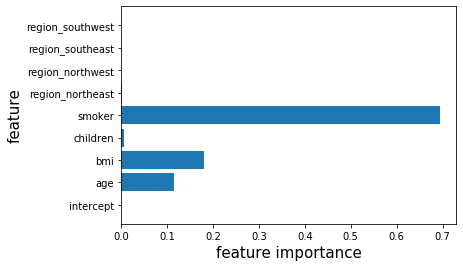

In [82]:
n_feature = X_train.shape[1]

idx = np.arange(n_feature)

plt.barh(idx, feature_imp, align='center')

plt.yticks(idx, col_names[:])

plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()

In [83]:
X_train

Intercept   age     bmi  children  smoker  region_northeast  \
560         1.0  46.0  19.950       2.0     1.0               0.0   
1285        1.0  47.0  24.320       0.0     1.0               1.0   
1142        1.0  52.0  24.860       0.0     1.0               0.0   
969         1.0  39.0  34.320       5.0     1.0               0.0   
486         1.0  54.0  21.470       3.0     1.0               0.0   
...         ...   ...     ...       ...     ...               ...   
1095        1.0  18.0  31.350       4.0     1.0               1.0   
1130        1.0  39.0  23.870       5.0     1.0               0.0   
1294        1.0  58.0  25.175       0.0     1.0               1.0   
860         1.0  37.0  47.600       2.0     0.0               0.0   
1126        1.0  55.0  29.900       0.0     1.0               0.0   

      region_northwest  region_southeast  region_southwest  
560                1.0               0.0               0.0  
1285               0.0               0.0               0.0  
1142               0.0               1.0               0.0  
969                0.0               1.0               0.0  
486                1.0               0.0               0.0  
...                ...               ...               ...  
1095               0.0               0.0               0.0  
1130               0.0               1.0               0.0  
1294               0.0               0.0               0.0  
860                0.0               0.0               1.0  
1126               0.0               0.0               1.0  

[1070 rows x 9 columns]

## decision tree

In [84]:
import pandas as pd
Insurance = pd.read_csv(r'C:\Users\goldlab\OneDrive - seoultech.ac.kr\대학\2020-1\3. 데이터마이닝\프로젝트\DM_dataset\regression_data\US Health Insurance\insurance.csv',
                           encoding='utf-8', sep=',')

In [85]:
Insurance['smoker']=Insurance['smoker'].replace('yes',0)
Insurance['smoker']=Insurance['smoker'].replace('no',1)

In [86]:
del Insurance['sex']

In [87]:
def dummy_data(data, columns) :
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data

dummy_columns = ["region"]
Insurance = dummy_data(Insurance, dummy_columns)

In [88]:
Insurance['charges_class'] = Insurance['charges']

In [89]:
Insurance.loc[(Insurance.charges < 4740), "charges_class"] = "A"
Insurance.loc[(Insurance.charges < 9382)& (Insurance.charges >= 4740), "charges_class"] = "B"
Insurance.loc[(Insurance.charges < 16639)& (Insurance.charges >= 9382), "charges_class"] = "C"
Insurance.loc[(Insurance.charges >= 16639), "charges_class"] = "D"

In [90]:
del Insurance['charges']

In [91]:
Insurance['charges_class'].unique()

array(['D', 'A', 'B', 'C'], dtype=object)

In [92]:
Insurance['charges_class'].describe()

count     1338
unique       4
top          D
freq       335
Name: charges_class, dtype: object

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <a list of 10 Patch objects>)

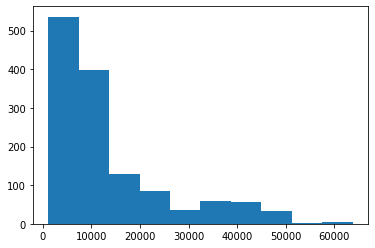

In [93]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(y, bins=10)

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [95]:
Insurance[20:25]

age     bmi  children  smoker  region_northeast  region_northwest  \
20   60  36.005         0       1                 1                 0   
21   30  32.400         1       1                 0                 0   
22   18  34.100         0       1                 0                 0   
23   34  31.920         1       0                 1                 0   
24   37  28.025         2       1                 0                 1   

    region_southeast  region_southwest charges_class  
20                 0                 0             C  
21                 0                 1             A  
22                 1                 0             A  
23                 0                 0             D  
24                 0                 0             B

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
X, y = Insurance.iloc[:,0:8], Insurance.iloc[:,-1] 

# 자동으로 데이터셋을 분리해주는 함수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 데이터 표준화 작업
sc = StandardScaler()
sc.fit(X_train)

# 표준화된 데이터셋
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [99]:
iris_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [100]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.828


In [101]:
col_names = ['age','bmi','children','smoker','region_northeast','region_northwest','region_southeast','region_southwest']

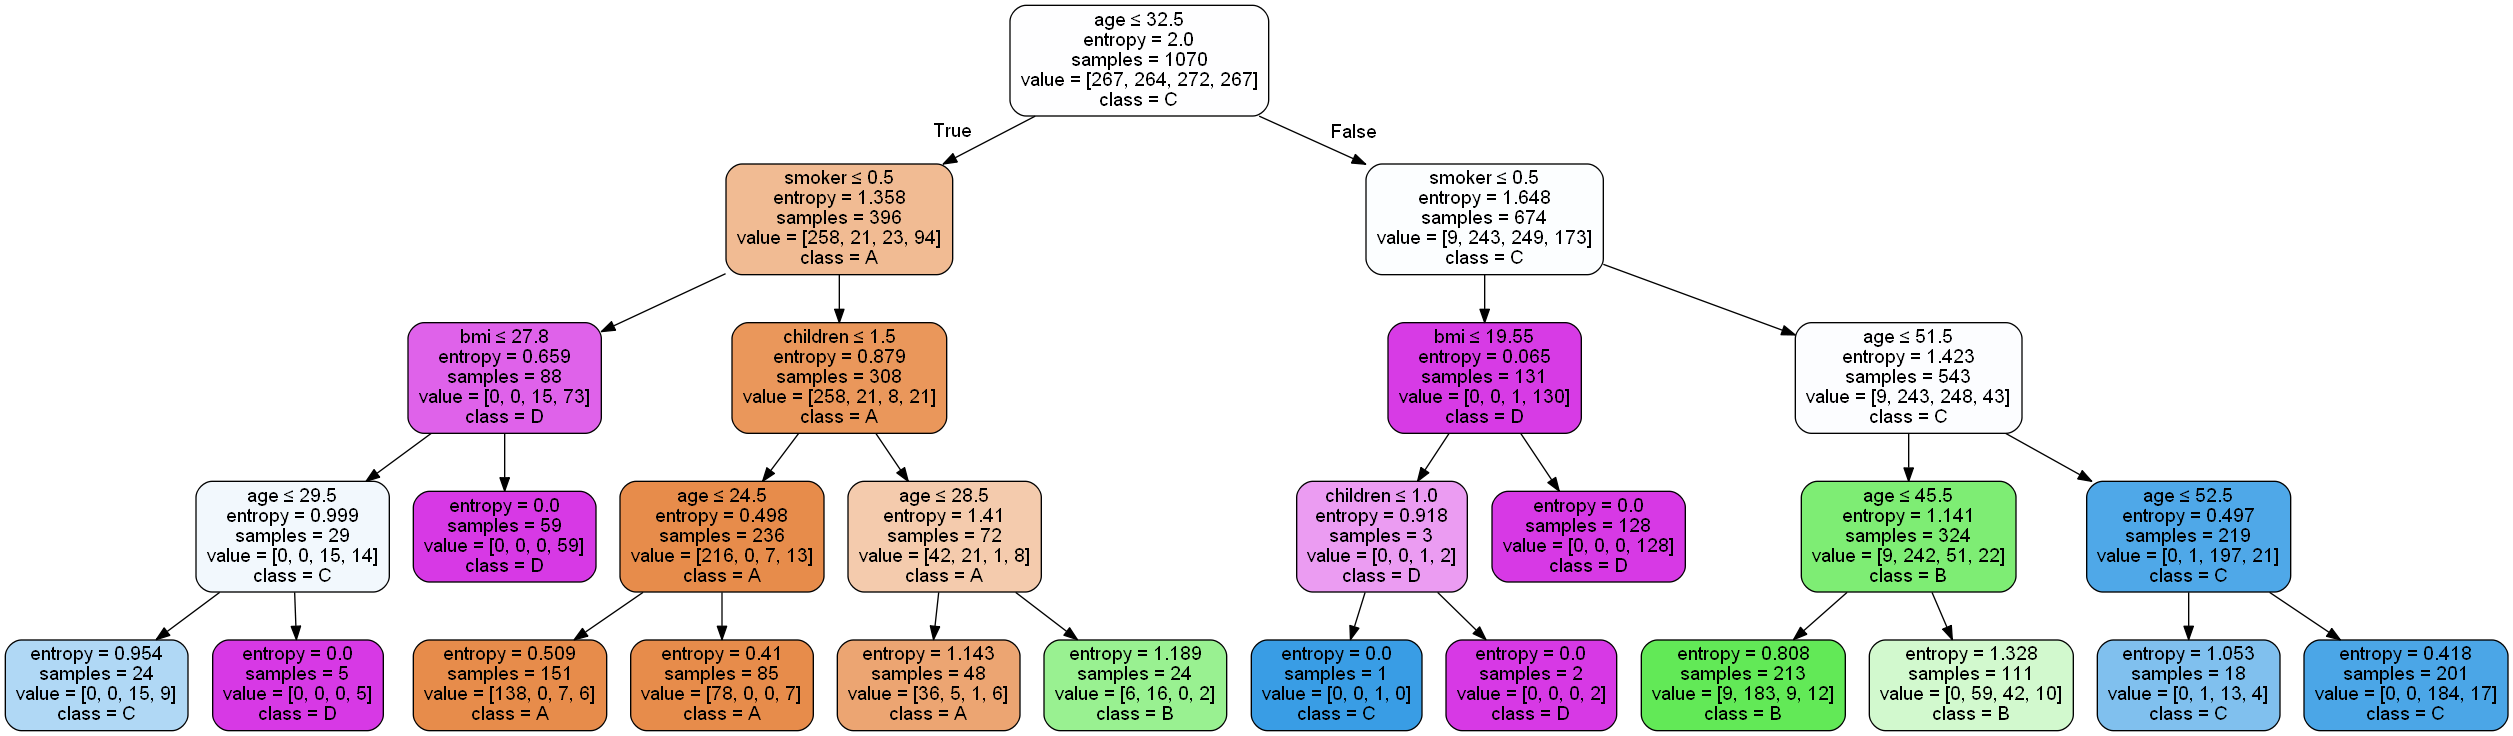

In [102]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(iris_tree, out_file=None, feature_names=col_names,
                          class_names=['A','B','C','D'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Gradient Boosting

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Insurance = pd.read_csv(r'C:\Users\goldlab\OneDrive - seoultech.ac.kr\대학\2020-1\3. 데이터마이닝\프로젝트\DM_dataset\regression_data\US Health Insurance\insurance.csv',
                           encoding='utf-8', sep=',')

In [104]:
Insurance['sex']=Insurance['sex'].replace('female',0)
Insurance['sex']=Insurance['sex'].replace('male',1)
Insurance['smoker']=Insurance['smoker'].replace('yes',0)
Insurance['smoker']=Insurance['smoker'].replace('no',1)

In [105]:
def dummy_data(data, columns) :
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data

dummy_columns = ["region"]
Insurance = dummy_data(Insurance, dummy_columns)

In [106]:
del Insurance['sex']

In [107]:
Insurance.head()

charges  age     bmi  children  smoker  region_northeast  \
0  16884.92400   19  27.900         0       0                 0   
1   1725.55230   18  33.770         1       1                 0   
2   4449.46200   28  33.000         3       1                 0   
3  21984.47061   33  22.705         0       1                 0   
4   3866.85520   32  28.880         0       1                 0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  
1                 0                 1                 0  
2                 0                 1                 0  
3                 1                 0                 0  
4                 1                 0                 0

In [108]:
from sklearn.model_selection import train_test_split
X, y = Insurance.iloc[:,1:], Insurance.iloc[:,0] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [109]:
# Feature Scaling # 각 feature의 평균을 0, 분산을 1로 변경, 모든 특성들이 같은 스케일을 갖게 됨.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# train data는 fit_transform 스케일링
X_train = sc.fit_transform(X_train)

# test data는 transform으로 스케일링
X_test = sc.transform(X_test)

In [110]:
np.set_printoptions(suppress=True, precision=True)
X_train

array([[-0.1,  0.5,  2.4, ..., -0.6, -0.6,  1.7],
       [-1.5,  0.6, -0.9, ..., -0.6,  1.6, -0.6],
       [-1.1,  1. ,  0.8, ..., -0.6, -0.6, -0.6],
       ...,
       [ 0.1, -0.9, -0.9, ..., -0.6,  1.6, -0.6],
       [-1.4,  0.8, -0.9, ...,  1.8, -0.6, -0.6],
       [-0.4, -2. , -0.1, ..., -0.6, -0.6,  1.7]])

In [111]:
# GradientBoosting#
from sklearn.ensemble import GradientBoostingRegressor

gbr_b = GradientBoostingRegressor(random_state=42, max_depth=4, min_samples_leaf=2, \
                                 n_estimators=20)
gbr_b

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=20,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [112]:
gbr_b.fit(X_train, y_train)

print("Train R-squared: %.3f" %gbr_b.score(X_train,y_train) )
print("Test R-squared: %.3f" %gbr_b.score(X_test,y_test) )

Train R-squared: 0.859
Test R-squared: 0.886


In [113]:
col_names = ['age','bmi','children','smoker','region_northeast','region_northwest','region_southeast','region_southwest']

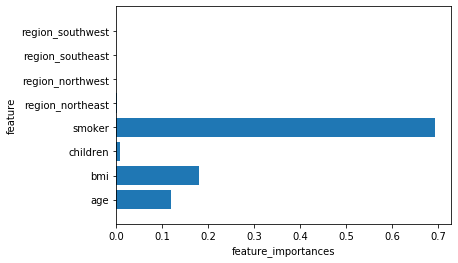

In [114]:
def plot_feature_importances(model):
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), col_names)
    plt.xlabel("feature_importances")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances(gbr_b)

In [115]:
from sklearn.model_selection import GridSearchCV

# n_estimators: tree 갯수, max_features: random feature 수, 
# max_depth: tree의 가지수, learning rate: train set에 overfitting 방지용

gbr = GradientBoostingRegressor(random_state=42)

param_grid = [{'n_estimators': range(1, 100, 5), 'max_features': range(1, 13),
              'max_depth': range(3, 5), 'learning_rate': np.linspace(0.1, 1, 10)}]

gsr = GridSearchCV(estimator=gbr, param_grid=param_grid,  cv=5, verbose=1, n_jobs=-1)

gsr.fit(X_train, y_train)

Fitting 5 folds for each of 4800 candidates, totalling 24000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 5136 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 10912 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 16992 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 23797 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 24000 out of 24000 | elapsed:  1.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [116]:
# 모든 모델 중 가장 성능이 좋은 것을 뽑는 best estimator # n_estimators가 제일 높은 모델이 선정되는 것이 대부분
best_gsr_estimator = gsr.best_estimator_
best_gsr_estimator

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=6, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=46,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [117]:
gsr.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 6, 'n_estimators': 46}

In [118]:
print("Best Estimator Parameters" )
print("---------------------------" )
print("n_estimators: %d" %best_gsr_estimator.n_estimators )
print("max_depth: %d" %best_gsr_estimator.max_depth )
print("Learning Rate: %.1f" %best_gsr_estimator.learning_rate )
print("min_samples_leaf: %d" %best_gsr_estimator.min_samples_leaf )
print("max_features: %.1f" %best_gsr_estimator.max_features) 
print("---------------------------" )
print("Train R-squared: %.2f" %best_gsr_estimator.score(X_train,y_train) )
print("Test R-squared: %.2f" %best_gsr_estimator.score(X_test,y_test) )

Best Estimator Parameters
---------------------------
n_estimators: 46
max_depth: 3
Learning Rate: 0.1
min_samples_leaf: 1
max_features: 6.0
---------------------------
Train R-squared: 0.88
Test R-squared: 0.90


In [119]:
best_gsr_estimator.estimators_

array([[DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x13784F3B8C8,
                      splitter='best')],
       [DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x13784F3B8C8,
                      splitter='best')],
       [DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedm

In [120]:
best_gsr_estimator.feature_importances_

array([0.1, 0.2, 0. , 0.7, 0. , 0. , 0. , 0. ])

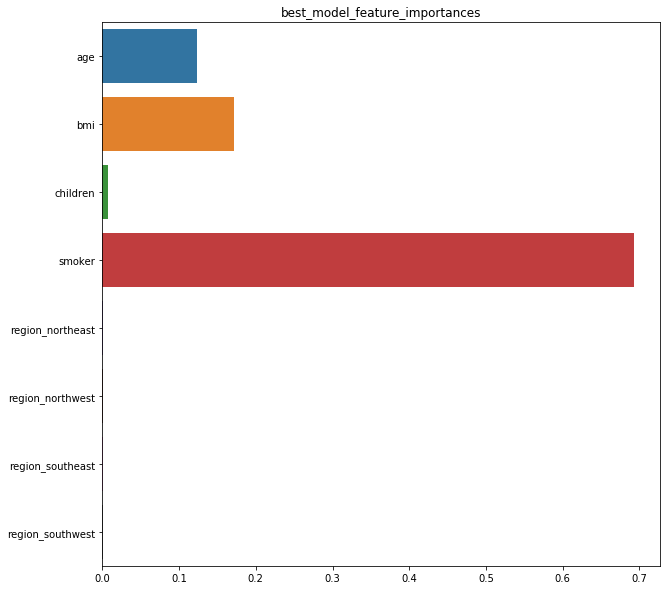

In [121]:
# feature_importances_: feature별 중요도를 수치로 표현 (총합:1)
## 결정에 각 특성이 얼마나 중요한지 평가하는 것
import seaborn as sns

ft_importances = pd.Series(best_gsr_estimator.feature_importances_, index = col_names)

plt.figure(figsize=(10,10))
plt.title("best_model_feature_importances")
sns.barplot(x=ft_importances, y=col_names)
plt.show()

In [122]:
# learning_curve: Determines cross-validated training and test scores for different training set sizes.
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)): 
    plt.figure() 
    plt.title(title) 
    if ylim is not None: 
        plt.ylim(*ylim) 
    plt.xlabel("Training examples") 
    plt.ylabel("Score") 
    train_sizes, train_scores, test_scores = learning_curve( estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes) 
    train_scores_mean = np.mean(train_scores, axis=1) 
    train_scores_std = np.std(train_scores, axis=1) 
    test_scores_mean = np.mean(test_scores, axis=1) 
    test_scores_std = np.std(test_scores, axis=1) 
    plt.grid() 
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r") 
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g") 
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score") 
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score") 
    plt.legend(loc="best") 
        
    return plt 

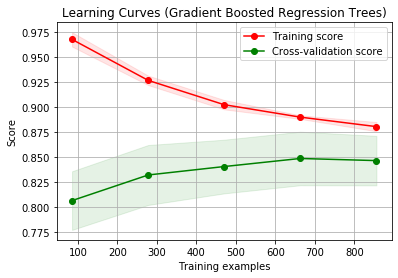

In [123]:
# train data의 size가 커지면 커질수록 train srcore와 valid score의 격차가 줄어듦 #
title = "Learning Curves (Gradient Boosted Regression Trees)"
estimator = GradientBoostingRegressor(n_estimators=best_gsr_estimator.n_estimators, 
                                      max_depth=best_gsr_estimator.max_depth, 
                                      learning_rate=best_gsr_estimator.learning_rate, 
                                      min_samples_leaf=best_gsr_estimator.min_samples_leaf, 
                                      max_features=best_gsr_estimator.max_features) 
# estimator: bset estimator
plot_learning_curve(estimator, title, X_train, y_train, cv=5, n_jobs=-1) 
plt.show()

In [124]:
best_gsr_estimator.estimators_

array([[DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x13784F3B8C8,
                      splitter='best')],
       [DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x13784F3B8C8,
                      splitter='best')],
       [DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedm